# **End-Term project**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [10]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV файла
df = pd.read_csv('adult.csv')  # Убедитесь, что файл 'adult.csv' в правильном каталоге

# Просмотр первых 5 строк данных
df.head()  # Покажет первые 5 строк



,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [12]:
# Corrected code
df.info()  # Displays general information about the dataset
df.describe(include='all')  # Describes all columns, including categorical ones
df.columns  # Lists all column names
df.head()  # Displays the first 5 rows of the dataframe



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [15]:
print(df.isnull().sum())
print("Дубликатов:", df.duplicated().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
Дубликатов: 24


In [16]:
df = df.drop_duplicates()

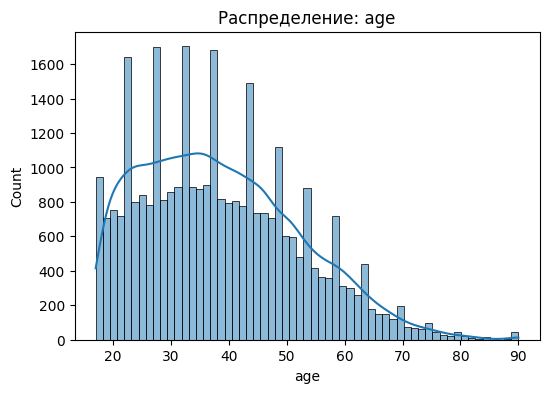

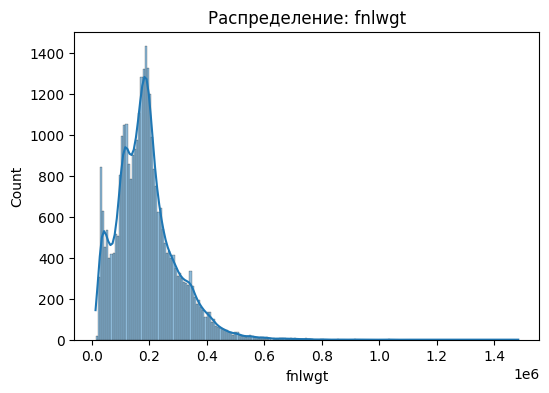

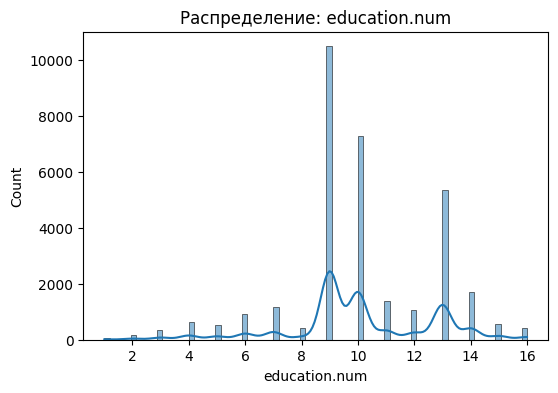

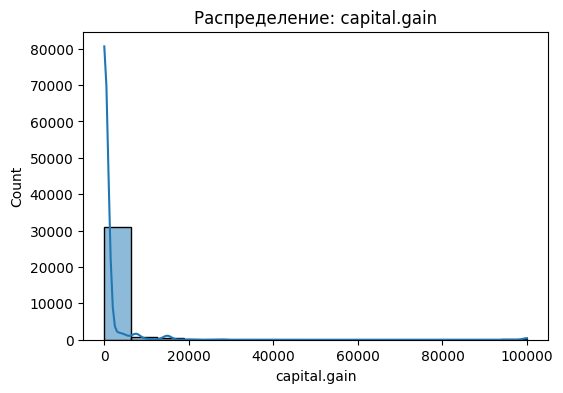

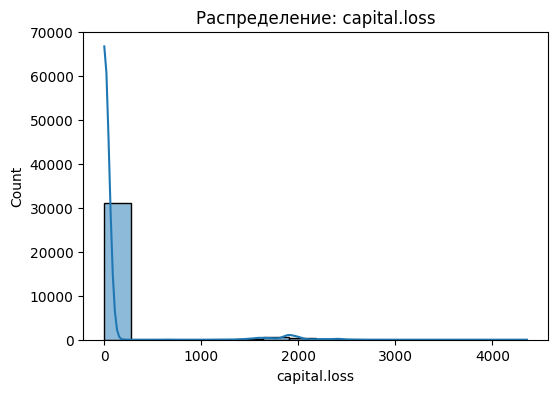

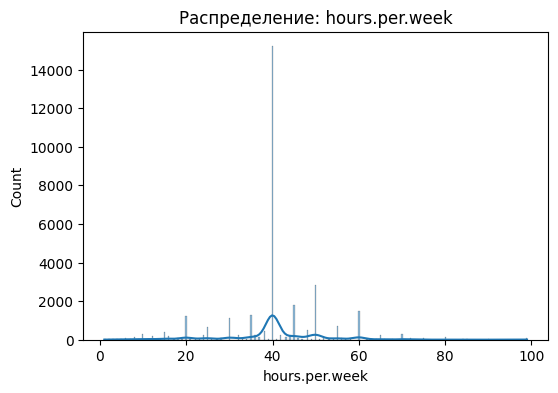

In [18]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Распределение: {col}')
    plt.show()

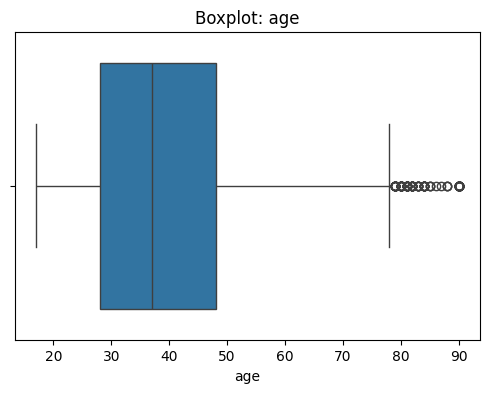

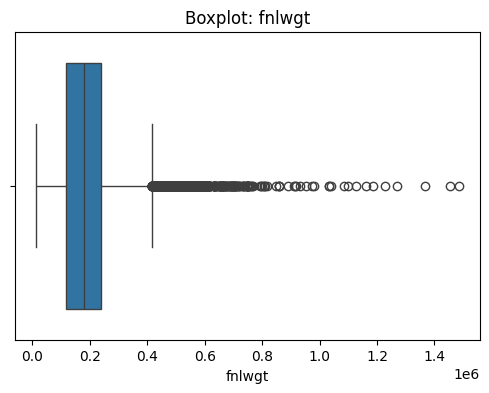

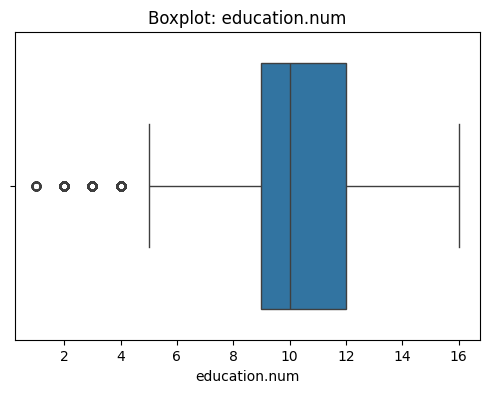

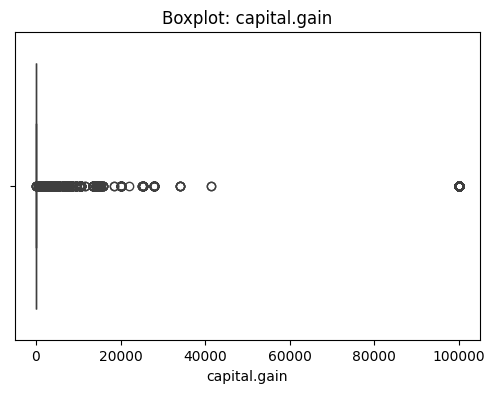

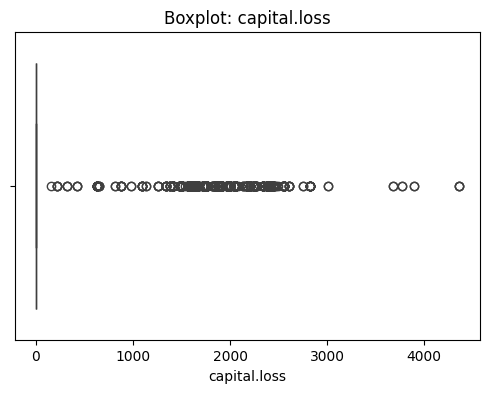

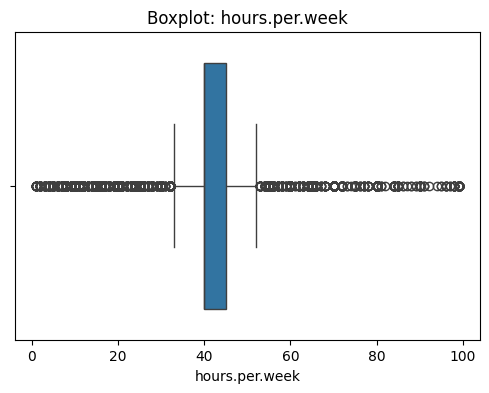

In [20]:
for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.show()

In [22]:
cat_features = df.select_dtypes(include=['object']).columns
for col in cat_features:
    print(f"{col} - уникальных значений: {df[col].nunique()}")
    print(df[col].value_counts(normalize=True)[:5])
    print("-"*40)

workclass - уникальных значений: 9
workclass
Private             0.696837
Self-emp-not-inc    0.078065
Local-gov           0.064327
?                   0.056428
State-gov           0.039893
Name: proportion, dtype: float64
----------------------------------------
education - уникальных значений: 16
education
HS-grad         0.322525
Some-college    0.223807
Bachelors       0.164520
Masters         0.052924
Assoc-voc       0.042475
Name: proportion, dtype: float64
----------------------------------------
marital.status - уникальных значений: 7
marital.status
Married-civ-spouse    0.460092
Never-married         0.327842
Divorced              0.136491
Separated             0.031503
Widowed               0.030519
Name: proportion, dtype: float64
----------------------------------------
occupation - уникальных значений: 15
occupation
Prof-specialty     0.127117
Craft-repair       0.125826
Exec-managerial    0.124935
Adm-clerical       0.115807
Sales              0.112180
Name: proportion, d

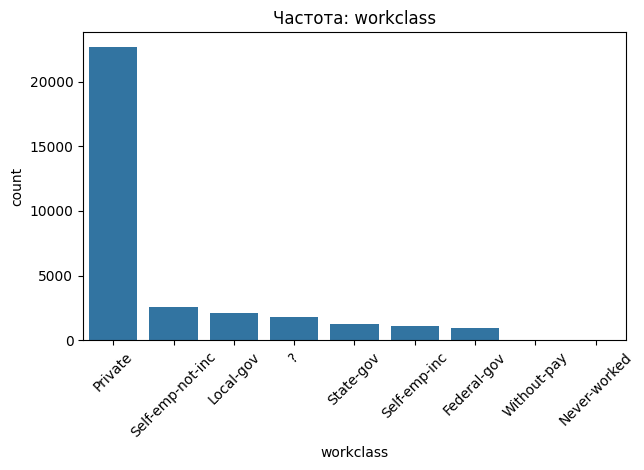

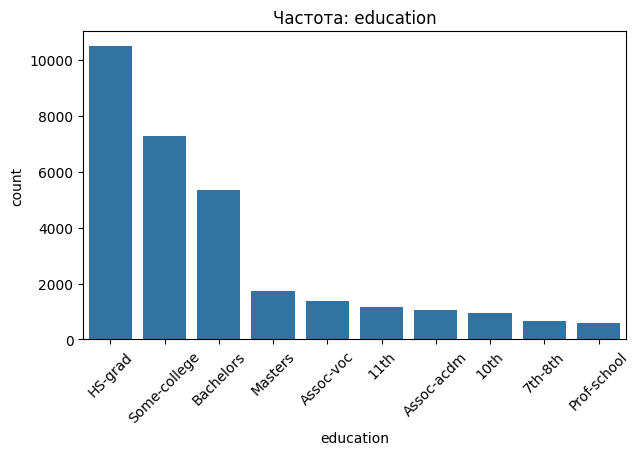

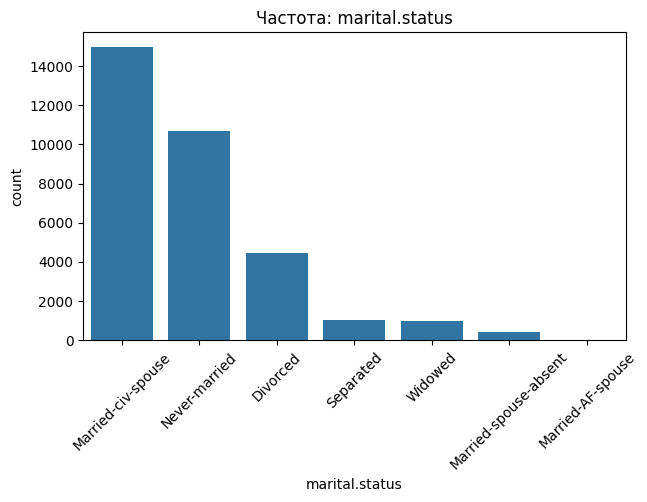

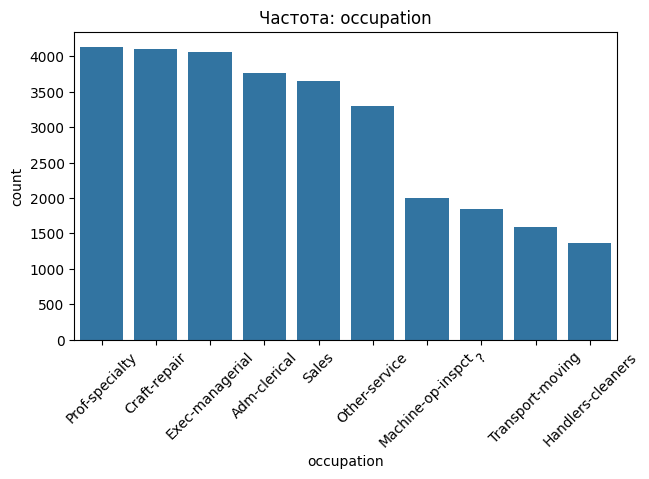

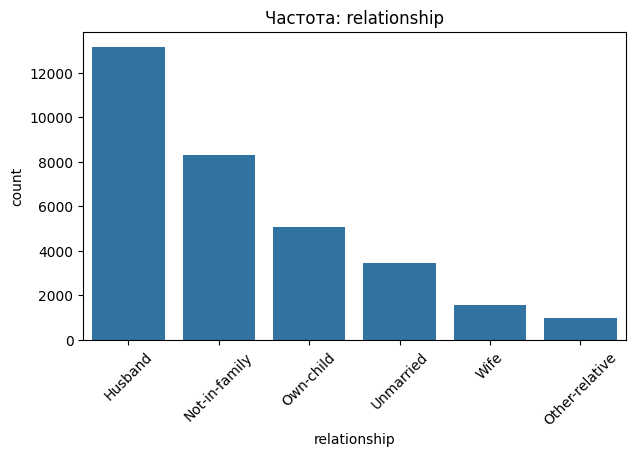

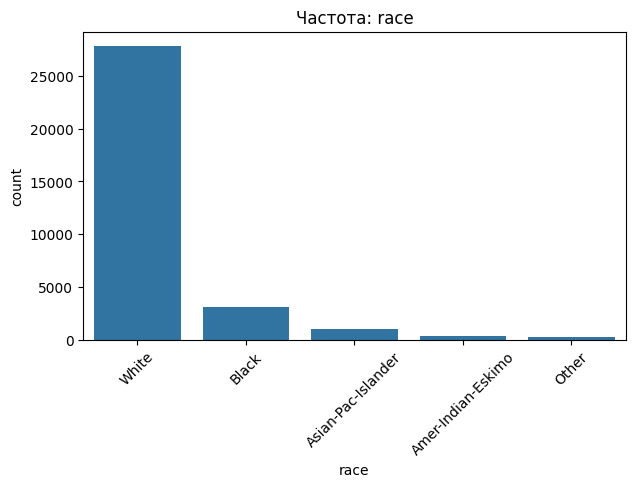

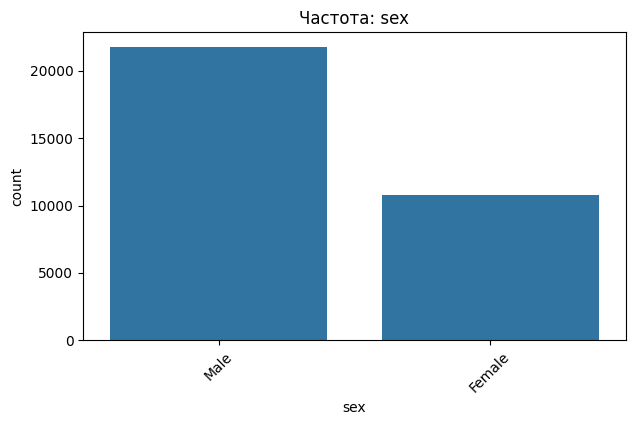

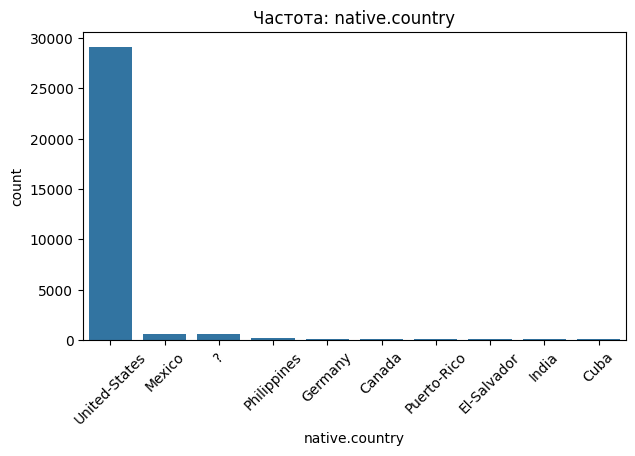

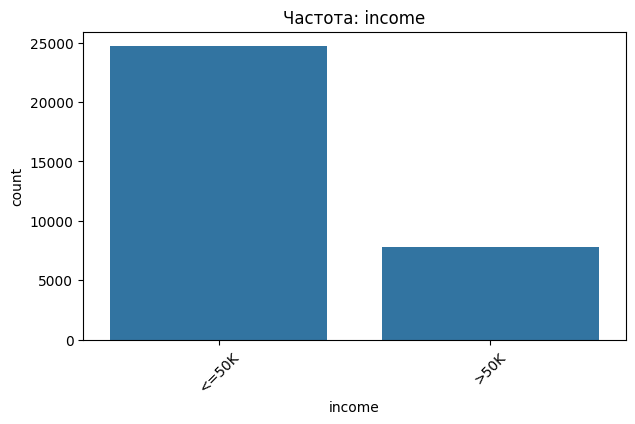

In [25]:
for col in cat_features:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f'Частота: {col}')
    plt.xticks(rotation=45)
    plt.show()

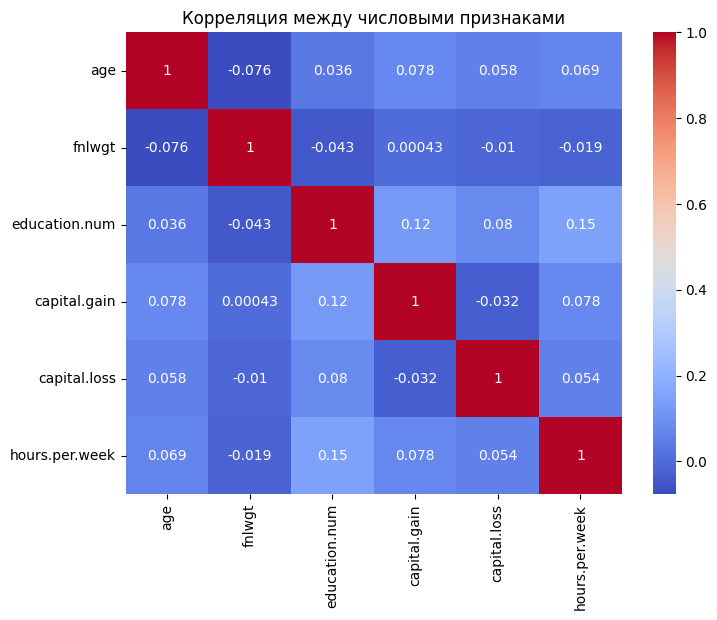

In [27]:
corr_matrix = df[num_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Корреляция между числовыми признаками")
plt.show()

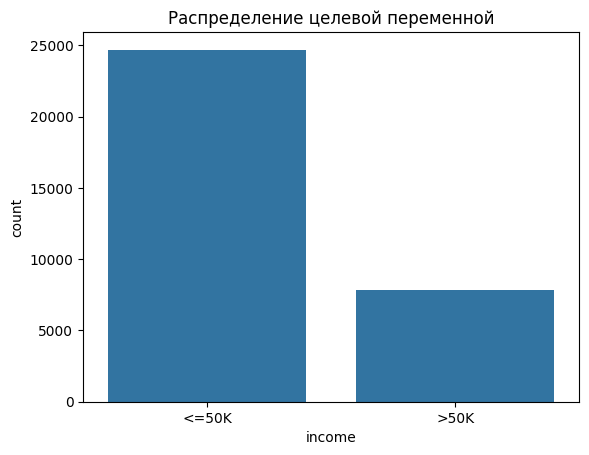

In [28]:
sns.countplot(data=df, x='income')
plt.title("Распределение целевой переменной")
plt.show()

In [30]:
data = df.replace('?', np.nan)
data.dropna(inplace=True)

X = data.drop('income', axis=1)
y = data['income']

cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
pipe_lr = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])
pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8531851360318513


In [33]:
pipe_rf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(n_estimators=100))])
pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8492037159920371


In [34]:
pipe_knn = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', KNeighborsClassifier(n_neighbors=5))])
pipe_knn.fit(X_train, y_train)
y_pred_knn = pipe_knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.8271400132714002


In [35]:
pipe_svm = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(kernel='linear'))])
pipe_svm.fit(X_train, y_train)
y_pred_svm = pipe_svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.8511944260119443


In [37]:
from sklearn.preprocessing import FunctionTransformer

# Add a step to convert sparse data to dense
pipe_nb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),  # Convert to dense
    ('classifier', GaussianNB())
])

pipe_nb.fit(X_train, y_train)
y_pred_nb = pipe_nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.5124419376244194


In [38]:
pipe_gb = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', GradientBoostingClassifier())])
pipe_gb.fit(X_train, y_train)
y_pred_gb = pipe_gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8666224286662243


In [45]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode labels to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create the pipeline
pipe_xgb = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))])

pipe_xgb.fit(X_train, y_train_encoded)  # Use the encoded labels
y_pred_xgb = pipe_xgb.predict(X_test)
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)  # Decode the predictions back to original labels

# Print the accuracy
print("XGBoost Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))



XGBoost Accuracy: 0.8734240212342402


In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Decode the predicted labels back to original labels
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)

models = {
    "LogisticRegression": y_pred_lr,
    "RandomForest": y_pred_rf,
    "KNN": y_pred_knn,
    "SVM": y_pred_svm,
    "NaiveBayes": y_pred_nb,
    "GradientBoosting": y_pred_gb,
    "XGBoost": y_pred_xgb_decoded,  # Use the decoded predictions
}

for name, pred in models.items():
    print(f"\n{name}:")
    print("Precision:", precision_score(y_test, pred, pos_label='>50K'))
    print("Recall:", recall_score(y_test, pred, pos_label='>50K'))
    print("F1 Score:", f1_score(y_test, pred, pos_label='>50K'))



LogisticRegression:
Precision: 0.7339983374896093
Recall: 0.6098066298342542
F1 Score: 0.6661637118068653

RandomForest:
Precision: 0.7081081081081081
Recall: 0.6332872928176796
F1 Score: 0.6686110098432373

KNN:
Precision: 0.6452074391988555
Recall: 0.6229281767955801
F1 Score: 0.6338721011946592

SVM:
Precision: 0.7356715141146278
Recall: 0.5939226519337016
F1 Score: 0.6572411157814291

NaiveBayes:
Precision: 0.3247119680225723
Recall: 0.9537292817679558
F1 Score: 0.4844764076477811

GradientBoosting:
Precision: 0.7834507042253521
Recall: 0.6146408839779005
F1 Score: 0.6888544891640866

XGBoost:
Precision: 0.7759871071716358
Recall: 0.6650552486187845
F1 Score: 0.7162513945704723


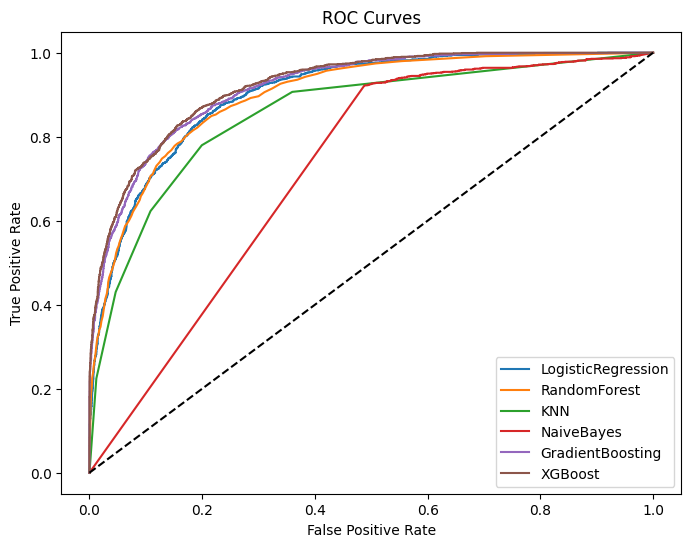

In [48]:
plt.figure(figsize=(8,6))
for name, pipe in zip(models.keys(), [pipe_lr, pipe_rf, pipe_knn, pipe_svm, pipe_nb, pipe_gb, pipe_xgb]):
    if hasattr(pipe.named_steps['classifier'], 'predict_proba'):
        y_scores = pipe.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test.map({"<=50K": 0, ">50K": 1}), y_scores)
        plt.plot(fpr, tpr, label=name)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [50]:
param_grid = {
    'classifier__n_estimators': [100],  # Reduce number of values
    'classifier__max_depth': [10]        # Reduce number of values
}
gs = GridSearchCV(pipe_rf, param_grid, cv=2, scoring='accuracy')
gs = GridSearchCV(pipe_rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gs.fit(X_train[:1000], y_train[:1000])


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10],
                         'classifier__n_estimators': [100]},
             scoring='accuracy')

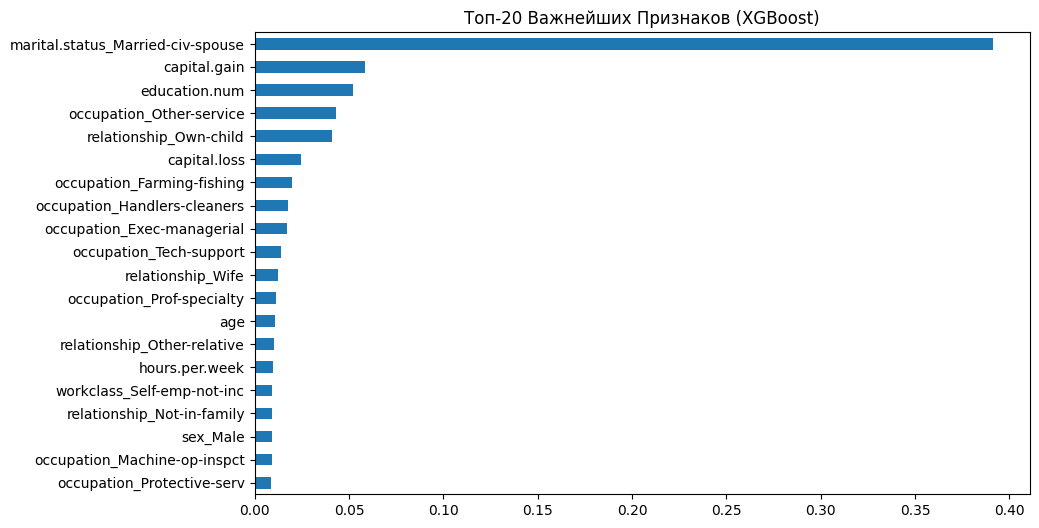

In [51]:
xgb_model = pipe_xgb.named_steps['classifier']
importances = xgb_model.feature_importances_
feature_names = pipe_xgb.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_cols)
feature_names = list(num_cols) + list(feature_names)
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:20]

plt.figure(figsize=(10, 6))
feat_imp.plot(kind='barh')
plt.title("Топ-20 Важнейших Признаков (XGBoost)")
plt.gca().invert_yaxis()
plt.show()